# Dependencies and Reading Raw Data

In [1]:
import pandas as pd
import sklearn
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Raw Data 
astro_df = pd.read_csv('Skyserver_2019.csv')
astro_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [3]:
# Removing useless columns for ML analysis.
astro_df = astro_df[['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']]

# Separating Training and Test Data

# Stratifying Data Based on Redshift (assumption that redshift is important!)

<AxesSubplot:>

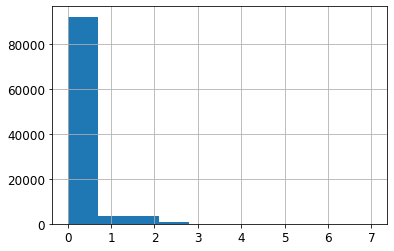

In [4]:
astro_df['redshift'].hist()

In [5]:
astro_df["redshift_cat"] = pd.cut(astro_df["redshift"],
                               bins=[-1, 0., .5, 1.0, 1.5, 2.0, 2.5, np.inf],
                               labels=[-1, 0, 1, 2, 3, 4, 5])

In [6]:
astro_df['redshift_cat'].value_counts()

0     66391
-1    24938
2      2825
3      2464
1      2071
4      1011
5       300
Name: redshift_cat, dtype: int64

<AxesSubplot:>

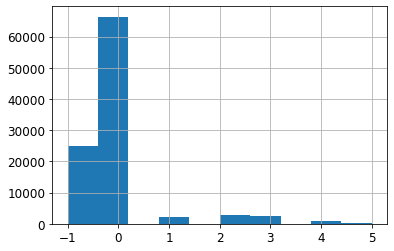

In [7]:
astro_df['redshift_cat'].hist()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(astro_df, test_size=0.2, random_state=42, stratify=astro_df['redshift_cat']) 

In [9]:
# Using Sklearn's Statify Method 

# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(astro_df, astro_df['redshift_cat']):
    
#     strat_train_set = astro_df.loc[train_index]
#     strat_test_set = astro_df.loc[test_index]

In [10]:
# Now that we have stratified our data based on redshift vales, we can drop the redshift category column.
# strat_train_set.drop(['redshift_cat'], axis=1, inplace=True)
# strat_test_set.drop(['redshift_cat'], axis=1, inplace=True)

train_set.drop(['redshift_cat'], axis=1, inplace=True)
test_set.drop(['redshift_cat'], axis=1, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Data Cleaning and Preperation for ML Algorithms

In [11]:
# Separating Independant from Dependant Variables
# astro_data = strat_train_set.drop("class", axis=1) # X
# astro_labels = strat_train_set["class"] # Y

x_train = train_set.drop("class", axis=1)
y_train = train_set["class"]

In [12]:
# from sklearn.preprocessing import LabelEncoder

# cat_encoder = LabelEncoder()
# astro_labels = cat_encoder.fit_transform(astro_labels)
# astro_labels

In [13]:
# Will have to One Hot Encode the Dependant var
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# astro_cat_1hot = cat_encoder.fit_transform(astro_labels.reshape(-1,1))
# astro_cat_1hot

In [14]:
# Will use Standardized Scaler for Independant vars
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

x_train_prepared = num_pipeline.fit_transform(x_train)


# num_attribs = list(x_train_numbers)


# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs)
#     ])

# x_train_prepared = full_pipeline.fit_transform(x_train)






# Models

# SGD Classifier

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42, loss='log')
sgd_classifier.fit(x_train_prepared, y_train)

SGDClassifier(loss='log', random_state=42)

In [16]:
# Score on the trained dataset 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, x_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.94798815, 0.94708816, 0.94738618])

In [17]:
# Looking at the Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_predictions = cross_val_predict(sgd_classifier, x_train_prepared, y_train, cv=3)

labels = np.unique(y_train)

cm = confusion_matrix(y_train, y_train_predictions, labels=labels)


sgd_df = pd.DataFrame(cm, index=labels, columns=labels)

In [18]:
sgd_df

,GALAXY,QSO,STAR
GALAXY,38702,118,2211
QSO,958,7513,7
STAR,889,18,29584


In [19]:
sgd_df.to_csv('sgd_confusion.csv')

In [20]:
# from sklearn.metrics import f1_score

# f1_score(astro_labels, y_train_pred, average='micro')

In [21]:
# from sklearn.model_selection import GridSearchCV

# grid = {
#     'max_iter': [1000],
#     'penalty': [None, 'l2', 'l1', 'elasticnet'],
#     'eta0': [0, 0.1]
# }

# grid_search = GridSearchCV(sgd_classifier, grid, cv=5, verbose=3)



# grid_search.fit(astro_data_scaled, astro_labels)
#grid_search.best_params_

In [22]:
# y_train_pred = cross_val_predict(grid_search, astro_data_scaled, astro_labels, cv=3)

In [23]:
# cm = confusion_matrix(astro_labels, y_train_pred)

In [24]:
# Better f1 score
# f1_score(astro_labels, y_train_pred, average='micro')

In [25]:
# Better Confusion Matrix With Hyper Tuned Parameters

# labels = np.unique(y_train_pred)
# pd.DataFrame(cm, index=labels, columns=labels)

# Logistic Regression (OVR)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(x_train_prepared, y_train)



LogisticRegression(multi_class='ovr')

In [37]:
y_train_predictions = cross_val_predict(log_reg, x_train_prepared, y_train, cv=3)

labels = np.unique(y_train)

cm = confusion_matrix(y_train, y_train_predictions, labels=labels)
log_cm = pd.DataFrame(cm, index=labels, columns=labels)
log_cm

,GALAXY,QSO,STAR
GALAXY,39326,127,1578
QSO,939,7532,7
STAR,574,19,29898


In [38]:
log_cm.to_csv('log_cm.csv')

# Support Vector Machine

In [28]:
# from sklearn.svm import LinearSVC

# svm_clf = LinearSVC(C=1, loss="hinge", max_iter=30000)


# svm_clf.fit(astro_data_scaled, astro_labels)

In [29]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures

# polynomial_svm_clf = Pipeline([
#     ("poly_features", PolynomialFeatures(degree=3)),
#     ("svm_clf", LinearSVC(C=10, loss="hinge"))
    
# ])

# polynomial_svm_clf.fit(astro_data_scaled, astro_labels)

In [30]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True))
])




poly_kernel_svm_clf.fit(x_train_prepared, y_train)


Pipeline(steps=[('svm_clf',
                 SVC(C=5, coef0=1, kernel='poly', probability=True))])

In [35]:
y_train_predictions = cross_val_predict(poly_kernel_svm_clf, x_train_prepared, y_train, cv=3)

labels = np.unique(y_train)

cm = confusion_matrix(y_train, y_train_predictions, labels=labels)
svc_cm = pd.DataFrame(cm, index=labels, columns=labels)
svc_cm


,GALAXY,QSO,STAR
GALAXY,40270,110,651
QSO,394,8078,6
STAR,19,0,30472


In [36]:
svc_cm.to_csv('svm_cm.csv')

# Random Forrest Classifier






In [39]:
# from sklearn.preprocessing import LabelEncoder

# cat_encoder = LabelEncoder()
# astro_labels = cat_encoder.fit_transform(astro_labels)
# astro_labels

In [40]:
# cat_encoder.classes_

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(x_train_prepared, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_train_predictions = cross_val_predict(forest_clf, x_train_prepared, y_train, cv=3)

labels = np.unique(y_train)

cm = confusion_matrix(y_train, y_train_predictions, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,GALAXY,QSO,STAR
GALAXY,40804,146,81
QSO,456,8016,6
STAR,36,0,30455


In [41]:
from sklearn.model_selection import GridSearchCV

grid = {
    'criterion': ['gini'],
    'max_depth': [None, 2, 3],
    'n_estimators': [100, 200, 500, 1000, 2000]
}

grid_search = GridSearchCV(forest_clf, grid, cv=5, verbose=3)



grid_search.fit(x_train_prepared, y_train)
grid_search.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] criterion=gini, max_depth=None, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=None, n_estimators=100, score=0.992, total=  11.1s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, n_estimators=100, score=0.991, total=  11.2s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, n_estimators=100, score=0.990, total=  11.6s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................
[CV]  criterion=gini, max_depth=None, n_estimators=100, score=0.992, total=  11.1s
[CV] criterion=gini, max_depth=None, n_estimators=100 ................
[CV]  criterion=gini, max_depth=None, n_estimators=100, score=0.991, total=  11.2s
[CV] criterion=gini, max_depth=None, n_estimators=200 ................
[CV]  criterion=gini, max_depth=None, n_estimators=200, score=0.992, total=  23.3s
[CV] criterion=gini, max_depth=None, n_estimators=200 ................
[CV]  criterion=gini, max_depth=None, n_estimators=200, score=0.991, total=  23.2s
[CV] criterion=gini, max_depth=None, n_estimators=200 ................
[CV]  criterion=gini, max_depth=None, n_estimators=200, score=0.990, total=  23.3s
[CV] criterion=gini, max_depth=None, n_estimators=200 ................
[CV]  criterion=gini, max_depth=None, n_estimators=200, score=0.992, total= 

[CV]  criterion=gini, max_depth=3, n_estimators=200, score=0.973, total=   7.0s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=200, score=0.973, total=   6.9s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=200, score=0.974, total=   6.7s
[CV] criterion=gini, max_depth=3, n_estimators=200 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=200, score=0.972, total=   6.7s
[CV] criterion=gini, max_depth=3, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=500, score=0.974, total=  16.9s
[CV] criterion=gini, max_depth=3, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=500, score=0.973, total=  16.8s
[CV] criterion=gini, max_depth=3, n_estimators=500 ...................
[CV]  criterion=gini, max_depth=3, n_estimators=500, score=0.973, total=  16.6s
[CV] criterion

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 54.1min finished


{'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}

In [43]:
hyper_forest = RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=500)

In [44]:
y_train_predictions = cross_val_predict(hyper_forest, x_train_prepared, y_train, cv=3)

labels = np.unique(y_train)

cm = confusion_matrix(y_train, y_train_predictions, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

,GALAXY,QSO,STAR
GALAXY,40808,141,82
QSO,459,8013,6
STAR,37,0,30454


In [45]:
forrest_df = pd.DataFrame(cm, index=labels, columns=labels)
forrest_df.to_csv('forrest_confusion.csv')

# Ensemble

In [46]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(
estimators=[('sgd', sgd_classifier), ('lr', log_reg), ('svm', poly_kernel_svm_clf), ('rf', forest_clf)],
    voting='soft'
)


In [47]:
voting_clf.fit(x_train_prepared, y_train)

VotingClassifier(estimators=[('sgd',
                              SGDClassifier(loss='log', random_state=42)),
                             ('lr', LogisticRegression(multi_class='ovr')),
                             ('svm',
                              Pipeline(steps=[('svm_clf',
                                               SVC(C=5, coef0=1, kernel='poly',
                                                   probability=True))])),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [48]:
y_train_predictions = cross_val_predict(voting_clf, x_train_prepared, y_train, cv=3)

labels = np.unique(y_train)

cm = confusion_matrix(y_train, y_train_predictions, labels=labels)
ensemble_cm = pd.DataFrame(cm, index=labels, columns=labels)
ensemble_cm

,GALAXY,QSO,STAR
GALAXY,40267,117,647
QSO,575,7895,8
STAR,16,1,30474


In [49]:
ensemble_cm.to_csv('ensemble.csv')

In [50]:
stoop

NameError: name 'stoop' is not defined

# Using The Test Data

In [ ]:
# Testing the Test data 
x_test = strat_test_set.drop("class", axis=1)
x_test_scaled = StandardScaler().fit_transform(x_test)
y_test = strat_test_set["class"]

In [ ]:
predictions = forest_clf.predict(x_test_scaled)

In [ ]:
predictions = cat_encoder.inverse_transform(predictions)

In [ ]:
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
check_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
check_df.head(60)

In [ ]:
f1_score(y_test, predictions, average='micro')